# Workshop # 8 - Ensemble

In [1]:
#Import Python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

df = pd.read_csv("titanic-train.csv")

df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3]:
df2 = df.loc[:,['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [4]:
print('Age missing ', df2['Age'].isnull().sum())
print('PClass missing ', df2['Pclass'].isnull().sum())
print('SibSp missing ', df2['SibSp'].isnull().sum())
print('Parch missing ', df2['Parch'].isnull().sum())
print('Survived missing ', df2['Survived'].isnull().sum())

Age missing  177
PClass missing  0
SibSp missing  0
Parch missing  0
Survived missing  0


In [5]:
df2['Age'] = df2['Age'].fillna(df2['Age'].mean())

print('Age missing ', df2['Age'].isnull().sum())

Age missing  0


In [6]:
df2.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch'], dtype='object')

In [7]:
df3 = pd.get_dummies(df2)
df3.head()

,Survived,Pclass,Age,SibSp,Parch,Sex_female,Sex_male
0,0,3,22.0,1,0,0,1
1,1,1,38.0,1,0,1,0
2,1,3,26.0,0,0,1,0
3,1,1,35.0,1,0,1,0
4,0,3,35.0,0,0,0,1


In [9]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(df3[['Pclass','Sex_male','Sex_female','Age','SibSp','Parch']], 
                                                    df3['Survived'], 
                                                    train_size=0.7, 
                                                    random_state=123)
print("Labels for training and testing data")
print(train_X)

Labels for training and testing data
     Pclass  Sex_male  Sex_female        Age  SibSp  Parch
416       2         0           1  34.000000      1      1
801       2         0           1  31.000000      1      1
512       1         1           0  36.000000      0      0
455       3         1           0  29.000000      0      0
757       2         1           0  18.000000      0      0
275       1         0           1  63.000000      1      0
121       3         1           0  29.699118      0      0
443       2         0           1  28.000000      0      0
458       2         0           1  50.000000      0      0
653       3         0           1  29.699118      0      0
725       3         1           0  20.000000      0      0
395       3         1           0  22.000000      0      0
754       2         0           1  48.000000      1      2
40        3         0           1  40.000000      1      0
217       2         1           0  42.000000      1      0
457       1        

/Users/kris/anaconda3/anaconda/envs/softwarepark/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Create a random forest Classifier. By convention, clf means 'Classifier'
clf = RandomForestClassifier(n_estimators=50, oob_score=True, random_state=123456)

# Train the Classifier to take the training features and learn how they relate
# to the training y (the species)
clf.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=True, random_state=123456, verbose=0,
            warm_start=False)

In [11]:

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [12]:
print("Predicting Titanic on the train set using Random Forest")

y_train_pred = clf.predict(train_X)


print(classification_report(train_y, y_train_pred))
print(confusion_matrix(train_y, y_train_pred))


Predicting Titanic on the train set using Random Forest
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       379
           1       0.93      0.86      0.90       244

   micro avg       0.92      0.92      0.92       623
   macro avg       0.93      0.91      0.92       623
weighted avg       0.92      0.92      0.92       623

[[364  15]
 [ 33 211]]


In [18]:
print("Predicting Titanic on the test set using Random Forest")

y_pred = clf.predict(test_X)


print(classification_report(test_y, y_pred))
print(confusion_matrix(test_y, y_pred))


Predicting Titanic on the test set using Random Forest
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       170
           1       0.77      0.66      0.71        98

   micro avg       0.81      0.81      0.81       268
   macro avg       0.80      0.78      0.78       268
weighted avg       0.80      0.81      0.80       268

[[151  19]
 [ 33  65]]


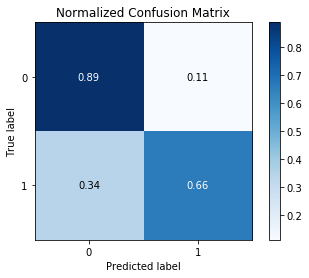

In [19]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(test_y, y_pred, normalize=True)
plt.show()

In [20]:
from sklearn.metrics import roc_auc_score
# calculate AUC
auc = roc_auc_score(test_y, y_pred)
print('AUC: %.3f' % auc)

AUC: 0.776


In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(n_estimators=10, random_state=1234)

ada_clf.fit(train_X, train_y)
scores = cross_val_score(ada_clf, train_X, train_y)
scores.mean()  

/Users/kris/anaconda3/anaconda/envs/softwarepark/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.7962153957577298

In [22]:
print("Predicting Titanic on the train set using Adaboost")

y_train_pred = ada_clf.predict(train_X)


print(classification_report(train_y, y_train_pred))
print(confusion_matrix(train_y, y_train_pred))


Predicting Titanic on the train set using Adaboost
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       379
           1       0.82      0.71      0.76       244

   micro avg       0.83      0.83      0.83       623
   macro avg       0.82      0.81      0.81       623
weighted avg       0.82      0.83      0.82       623

[[340  39]
 [ 70 174]]


In [23]:
print("Predicting Titanic on the test set using Adaboost")

y_pred = ada_clf.predict(test_X)


print(classification_report(test_y, y_pred))
print(confusion_matrix(test_y, y_pred))


Predicting Titanic on the test set using Adaboost
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       170
           1       0.80      0.70      0.75        98

   micro avg       0.83      0.83      0.83       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.83      0.83      0.83       268

[[153  17]
 [ 29  69]]


In [24]:
from sklearn.metrics import roc_auc_score
# calculate AUC
auc = roc_auc_score(test_y, y_pred)
print('AUC: %.3f' % auc)

AUC: 0.802
